Disaster Tweets

# Bag of Words Text Analysis

Inspect Data

In [60]:
import pandas as pd
import numpy as np

In [61]:
df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

In [62]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [63]:
X_test = test_df.text.values

In [64]:
print("type of disaster_tweets: {}".format(type(df)))
print("length of disaster_tweets: {}".format(len(df)))

type of disaster_tweets: <class 'pandas.core.frame.DataFrame'>
length of disaster_tweets: 7613


In [65]:
df[["text", "target"]].head(50)

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
5,#RockyFire Update => California Hwy. 20 closed...,1
6,#flood #disaster Heavy rain causes flash flood...,1
7,I'm on top of the hill and I can see a fire in...,1
8,There's an emergency evacuation happening now ...,1
9,I'm afraid that the tornado is coming to our a...,1


In [66]:
# Almost balanced dataset in terms of postive and negative reviews
df["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [67]:
# Inspect
print(X_train[:20])
print(y_train[:20])

['our deed be the reason of this earthquake may allah forgive all'
 'forest fire near la ronge sask canada'
 'all resident ask to shelter in place be be notify by officer no other evacuation or shelter in place order be expect'
 'people receive wildfire evacuation order in california'
 'just get send this photo from ruby alaska smoke from wildfire pour into school'
 'rockyfire update california hwy close in both direction due to lake county fire cafire wildfire'
 'flood disaster heavy rain cause flash flooding of street in manitou colorado spring area'
 "i'm on top of the hill and can see fire in the wood"
 "there's an emergency evacuation happen now in the building across the street"
 "i'm afraid that the tornado be come to our area"
 'three people die from the heat wave so far'
 'haha south tampa be get flood hah wait second live in south tampa what be gonna do what be gonna do fvck flood'
 "rain flood florida tampabay tampa or day i've lose count"
 'flood in bago myanmar we arrive b

In [68]:
# # Split raw data into train and test datasets
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# len(X_train)

# Clean Data

In [73]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
# from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df["clean_text"] = df["text"].apply(lambda x: clean_text(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jwr19\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [74]:
# Create variables as numpy arrays / covert positive and negative to 1s and 0s
X_train = df["clean_text"].values
y_train = df['target'].values

In [75]:
X_train

array(['our deed be the reason of this earthquake may allah forgive all',
       'forest fire near la ronge sask canada',
       'all resident ask to shelter in place be be notify by officer no other evacuation or shelter in place order be expect',
       ..., 'of volcano hawaii',
       'police investigate after an e-bike collided with car in little portugal e-bike rider suffer serious non-life threatening injury',
       'the late more home raze by northern california wildfire abc news'],
      dtype=object)

# CountVectorize: convert to "Bag of Words"

In [19]:
# Import and instantiate the Countvectorizer and fit to Yelp data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# Learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(X_train)

CountVectorizer()

In [20]:
print("Vocabulary size: {}".format(len(vectorizer.vocabulary_)))
print()
print("Vocabulary details: {}".format(vectorizer.vocabulary_))

Vocabulary size: 14703

Vocabulary details: {'our': 9304, 'deed': 3148, 'be': 1108, 'the': 12740, 'reason': 10458, 'of': 9062, 'this': 12839, 'earthquake': 3819, 'may': 7933, 'allah': 354, 'forgive': 4760, 'all': 353, 'forest': 4753, 'fire': 4593, 'near': 8680, 'la': 7140, 'ronge': 10911, 'sask': 11159, 'canada': 1885, 'resident': 10667, 'ask': 727, 'to': 12981, 'shelter': 11489, 'in': 6223, 'place': 9757, 'notify': 8908, 'by': 1801, 'officer': 9075, 'no': 8832, 'other': 9291, 'evacuation': 4216, 'or': 9238, 'order': 9253, 'expect': 4294, 'people': 9582, 'receive': 10475, 'wildfire': 14137, 'california': 1856, 'just': 6822, 'get': 5095, 'send': 11351, 'photo': 9674, 'from': 4891, 'ruby': 10990, 'alaska': 308, 'smoke': 11773, 'pour': 9921, 'into': 6421, 'school': 11228, 'rockyfire': 10872, 'update': 13530, 'hwy': 6032, 'close': 2368, 'both': 1523, 'direction': 3419, 'due': 3741, 'lake': 7160, 'county': 2737, 'cafire': 1832, 'flood': 4673, 'disaster': 3438, 'heavy': 5664, 'rain': 10344, 

In [21]:
# To create the "bag-of_words" representation we call the transform method or transform documents to document-term matrix.
X_train_vect = vectorizer.transform(X_train)
print("X_train_vect: {}".format(repr(X_train_vect)))

X_train_vect: <7613x14703 sparse matrix of type '<class 'numpy.int64'>'
	with 96746 stored elements in Compressed Sparse Row format>


In [22]:
print("Dense representation of bag_of_words:: \n{}".format(X_train_vect.toarray()))

Dense representation of bag_of_words:: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Examine Bag of Words

In [23]:
feature_names = vectorizer.get_feature_names()

print("Number of features: {}".format(len(feature_names)))
print()
print("First 100 features: \n{}".format(feature_names[:2000]))
print()
print("A lot numbers and gibberish have been converted to tokens - do they have any meaning?")

Number of features: 14703

First 100 features: 
['_keits', '_one', 'a__cee', 'aa', 'aaaa', 'aaaaaaallll', 'aaaaaand', 'aace_org', 'aan', 'aannnnd', 'aar', 'aaronthefm', 'aashiqui', 'aawzxykles', 'ab', 'aba', 'abandon', 'abandonedpics', 'abbandoned', 'abbott', 'abbruchsimulator', 'abbswinston', 'abbyairshow', 'abc', 'abcnews', 'abcnorio', 'abe', 'aberdeen', 'aberdeenfanpage', 'aberdeenfc', 'aberystwyth', 'abha', 'abia', 'ability', 'abject', 'ablaze', 'able', 'ableg', 'abninfvet', 'aboard', 'abomb', 'abomination', 'abortion', 'about', 'abouts', 'above', 'abq', 'abran_caballero', 'absence', 'absolute', 'absolutely', 'abstorm', 'abstract', 'absurd', 'absurdly', 'abuse', 'abused', 'abysmaljoiner', 'ac', 'acaciapenn', 'academia', 'acarewornheart', 'acc', 'accept', 'accepte', 'accepts', 'access', 'accident', 'accidentally', 'accidentalprophecy', 'accidently', 'accidents', 'accionempresa', 'accompany', 'accord', 'accordingly', 'account', 'accountable', 'accuracy', 'accuse', 'accustom', 'accust

In [24]:
print("Features 10000 to 10500: \n{}".format(feature_names[10000:10500]))
print()
print("Singular and plurals - e.g. employee and employees")
print("Similar words with little difference in meaning - 'experience', 'experienced', 'experiencing' ")

Features 10000 to 10500: 
['presidential', 'presley', 'press', 'presser', 'pressing', 'presssec', 'presstv', 'pressure', 'prestige', 'preston', 'presume', 'pretend', 'pretense', 'pretty', 'prettyboyshyflizzy', 'prevalent', 'prevent', 'preventative', 'prevention', 'preview', 'previous', 'previously', 'prez', 'price', 'priceless', 'pride', 'priest', 'primal', 'primalkitchen', 'primarily', 'primary', 'prime', 'prince', 'princeoffencing', 'princessduck', 'principle', 'print', 'printable', 'prior', 'priority', 'prison', 'prisoner', 'prisonplanet', 'privacy', 'private', 'privilege', 'prmtxjjdue', 'pro', 'prob', 'probability', 'probably', 'probe', 'problem', 'probs', 'proc', 'procedure', 'proceeds', 'process', 'prod', 'produc', 'produce', 'producer', 'product', 'producthunt', 'production', 'productive', 'profbriancox', 'professional', 'professionally', 'profile', 'profit', 'profittothepeople', 'program', 'programme', 'progress', 'progressive', 'prohibit', 'project', 'projectiles', 'proliferat

In [31]:
print("Every 25th feature: \n{}".format(feature_names[::25]))
print()
print("'hasn', ")

Every 25th feature: 
['_keits', 'abcnorio', 'absolutely', 'accordingly', 'acquire', 'ad', 'admit', 'aeg', 'africansinsf', 'agency', 'ahrar', 'aisle', 'alabama', 'aleisstokes', 'alipaper', 'alloy', 'alton', 'ameribag', 'amsterdam', 'ands', 'anime', 'answers', 'anything', 'apollobrown', 'approach', 'arabic', 'argument', 'arreat', 'arwx', 'aside', 'assistant', 'ate', 'attacked', 'audaciousspunk', 'author_mike', 'avi', 'awn', 'babes', 'badotweet', 'balance', 'bank', 'bare', 'basic', 'bay', 'bcpmvylsih', 'beautifully', 'beforeitsnews', 'believe', 'benews', 'besiege', 'bf', 'bieber', 'billmccabe', 'biryani', 'blackburn', 'blazing_ben', 'blks', 'blowltan', 'bnhtxaezmm', 'bolt', 'boomerangtime', 'bottle', 'boycottbears', 'brant', 'breath', 'briefcase', 'bro', 'brother', 'bts', 'build', 'burberryant', 'busines', 'bwp', 'cad', 'calgarians', 'campaign', 'cannibalism', 'capoeira', 'career', 'caroline', 'casper_rmg', 'catovitch', 'cdcgov', 'census', 'chachi', 'channelstv', 'charred', 'chemical', 'c

Perform baseline before we try to improve

In [56]:
# Build a classifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [57]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model

LogisticRegression(max_iter=1000)

In [58]:
scores = cross_val_score(model, X_train_vect, y_train, cv=5)

In [59]:
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.654


Reasonable performance for a balanced binary classification task. Try tuning regularization paramenter C to improve result.

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C":[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train_vect, y_train)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.726
Best parameters:  {'C': 0.1}


Assess the generalization performance on the test set using a C=10

In [23]:
submission_df = pd.read_csv("../data/sample_submission.csv")
submission_df.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [37]:
X_test[4]

'Typhoon Soudelor kills 28 in China and Taiwan'

In [39]:
my_input = vectorizer.transform(["Thousands killed in massive bee swarm"])
target = grid.predict(my_input)
str(target[0]).replace("0","Not a Disaster").replace("1","Disaster")

'Not a Disaster'

In [40]:
X_test_vect = vectorizer.transform(X_test)
target = grid.predict(X_test_vect)
submission_df["target"] = target
submission_df.to_csv("submissions/submission_v1.csv", index = False)
submission_df.head()

NameError: name 'submission_df' is not defined

Improve extraction of words

CountVectorizer extracts tokens using a regular expression "\b\w\w+\b" which finds all sequences of characters that consist of at least 2 letters or numbers (\w) and are separated by word boundaries. It splits contractions like doesn't into doesn and t. It converts all words to lowercase.

In [41]:
# Remove some of the useless tokens by setting a minimum number of documents a token needs to appear in with min_df
vectorizer = CountVectorizer(min_df=4).fit(X_train)
X_train_vect = vectorizer.transform(X_train)
print("X_train_vect with mind_df: {}".format(repr(X_train_vect)))

X_train_vect with mind_df: <7613x2921 sparse matrix of type '<class 'numpy.int64'>'
	with 81674 stored elements in Compressed Sparse Row format>


In [43]:
feature_names = vectorizer.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print()
print("First 20 features: \n{}".format(feature_names[:40]))
print()
print("Features 100 to 150: \n{}".format(feature_names[100:150]))
print()
print("Every 25th feature: \n{}".format(feature_names[::25]))

Number of features: 2921

First 20 features: 
['aba', 'abandon', 'abbswinston', 'abc', 'abcnews', 'abe', 'ability', 'ablaze', 'able', 'abortion', 'about', 'above', 'absolutely', 'abstorm', 'abuse', 'access', 'accident', 'accidentally', 'accord', 'account', 'accuse', 'acre', 'across', 'act', 'action', 'activate', 'activates', 'active', 'activity', 'actual', 'actually', 'add', 'address', 'admits', 'adult', 'advance', 'advisory', 'af', 'affect', 'afghan']

Features 100 to 150: 
['analysis', 'anchorage', 'ancient', 'and', 'angel', 'angeles', 'anger', 'angry', 'animal', 'animalrescue', 'ankle', 'annihilate', 'annihilation', 'anniversary', 'announcement', 'annoy', 'annual', 'another', 'answer', 'anthrax', 'anti', 'antioch', 'any', 'anybody', 'anymore', 'anyone', 'anything', 'anyway', 'ap', 'apartment', 'apc', 'apocalypse', 'apocalyptic', 'apollo', 'app', 'apparently', 'appear', 'apple', 'apply', 'appreciate', 'approach', 'ar', 'arabia', 'arabian', 'area', 'aren', 'arianagrande', 'arm', 'arma

In [44]:
model2 = LogisticRegression(solver='lbfgs', max_iter=1000)
model2

LogisticRegression(max_iter=1000)

In [45]:
grid = GridSearchCV(model2, param_grid, cv=5)

In [46]:
grid.fit(X_train_vect, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [47]:
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.725
Best parameters:  {'C': 0.1}


In [48]:
X_test_vect = vectorizer.transform(X_test)
print("{:.3f}".format(grid.score(X_test_vect, y_test)))

NameError: name 'y_test' is not defined

Reduced features from 1792 to 744 with no loss in model accuracy

# Stopwords

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword: \n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

In [ ]:
vectorizer = CountVectorizer(min_df=4, stop_words = "english").fit(X_train)
X_train_vect = vectorizer.transform(X_train)
print("X_train_vect with stop words:\n{}".format(repr(X_train_vect)))

In [ ]:
model3 = LogisticRegression(solver='lbfgs', max_iter=1000)
grid = GridSearchCV(model3, param_grid, cv=5)
grid.fit(X_train_vect, y_train)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

# Rescaling the Data with tf-idf

Term Frequency (TF) - Inverse Document Frequency (IDF) - i.e. give a high weight to any term that appears often in a particular document, but not in very many documents in the corpus. If a word appears many times in a document, but not in very many documents, it is likely to be descriptive of those documents.

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=3, norm=None), LogisticRegression(solver='lbfgs', max_iter=1000))
param_grid = {'logisticregression__C': [0.001, 0.01,0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))

Best cross-validation score: 0.733


In [50]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset
X_train_vect = vectorizer.transform(X_train)
# find maximum value for each of the features over the dataset
max_value = X_train_vect.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())
print("Number of features: {}".format(len(feature_names)))
print()
print("Features with lowest tfidf:\n{}".format(feature_names[sorted_by_tfidf[:50]]))
print()
print("Features with highest tfidf:\n{}".format(feature_names[sorted_by_tfidf[-50:]]))

Number of features: 3725

Features with lowest tfidf:
['death' 'scream' 'full' 'woman' 'many' 'as' 'find' 'destroy' 'blow'
 'evacuate' 'wave' 'right' 'read' 'fall' 'panic' 'old' 'those' 'hot'
 'fatal' 'die' 'detonate' 'photo' 'deluge' 'casualty' 'northern' 'https'
 'set' 'obliterate' 'release' 'any' 'hijack' 'everyone' 'flame' 'ever'
 'long' 'under' 'face' 'while' 'im' 'content' 'happen' 'most' 'since'
 'before' 'military' 'during' 'pick' 'send' 'next' 'tell']

Features with highest tfidf:
['ll' 'show' 'where' 'terrorist' 'he' 'road' 'baby' 'sinkhole' 'self'
 'lose' 'trauma' 'cool' 'ok' 'men' 'on' 'omg' 'beach' 'her' 'test' 'bag'
 'pain' 'pray' 'awesome' 'lane' 'court' 'hill' 'navy' 'route' 'ar' 'nc'
 'shoe' 'issue' 'al' 'justice' 'card' 'check' 'fire' 'bus' 'complex'
 'sean' 'his' 'same' 'build' 'hey' 'lt' 'bestnaijamade' 'ha' 'quest' 'gt'
 'wreck']


In [51]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['the' 'be' 'in' 'to' 'of' 'and' 'for' 'on' 'co' 'it' 'have' 'http' 'you'
 'my' 'that' 'with' 'by' 'at' 'this' 'from' 'get' 'like' 'fire' 'do' 'up'
 'but' 'just' 'so' 'me' 'amp' 'not' 'we' 'out' 'go' 'after' 'all' 'your'
 'no' 'an' 'will' 'can' 'if' 'when' 'new' 'what' 'now' 'via' 'more' 'they'
 'he' 'about' 'or' 'say' 'one' 'people' 'how' 'over' 'don' 'there' 'news'
 'who' 'bomb' 'into' 'make' 'video' 're' 'kill' 'time' 'come' 'body'
 'emergency' 'crash' 'year' 'see' 'attack' 'look' 'burn' 'disaster'
 'flood' 'home' 'than' 'day' 'take' 'would' 'know' 'police' 'still'
 'building' 'storm' 'life' 'some' 'think' 'california' 'back' 'off'
 'world' 'his' 'suicide' 'love' 'death']


# Model Coefficients

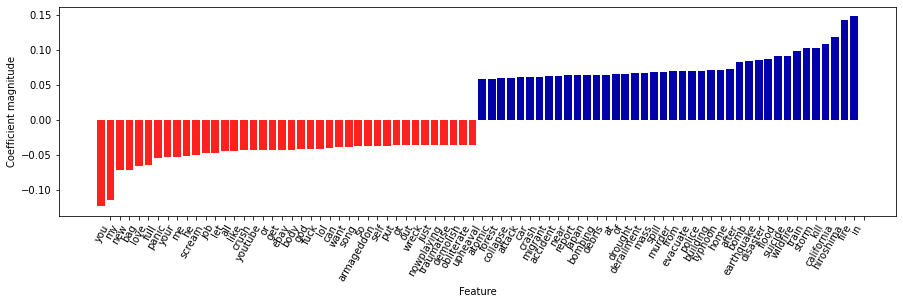

In [52]:
import mglearn
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"]
    .coef_, feature_names, n_top_features=40)

# Bag of Words with more than one word (n-Grams)

In bag-of-words, word order is discarded.

In [53]:
pipe = make_pipeline(TfidfVectorizer(min_df=6), LogisticRegression(solver='lbfgs', max_iter=10000))
# running the grid search takes a long time because of the large grid and inclusion of tri-grams
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100], "tfidfvectorizer__ngram_range": [(1,1), (1,2), (1,3)]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: \n{}".format(grid.best_params_))

Best cross-validation score: 0.723
Best parameters: 
{'logisticregression__C': 1, 'tfidfvectorizer__ngram_range': (1, 3)}


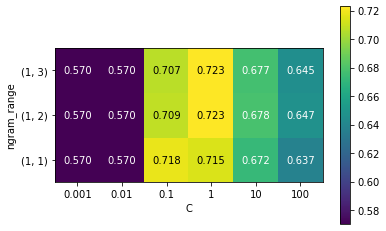

In [54]:
# extract scores from grid_search
import matplotlib.pyplot as plt
scores = grid.cv_results_["mean_test_score"].reshape(-1,3).T
# visualize heat map
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f", 
    xticklabels=param_grid["logisticregression__C"],
    yticklabels=param_grid["tfidfvectorizer__ngram_range"])
plt.colorbar(heatmap)

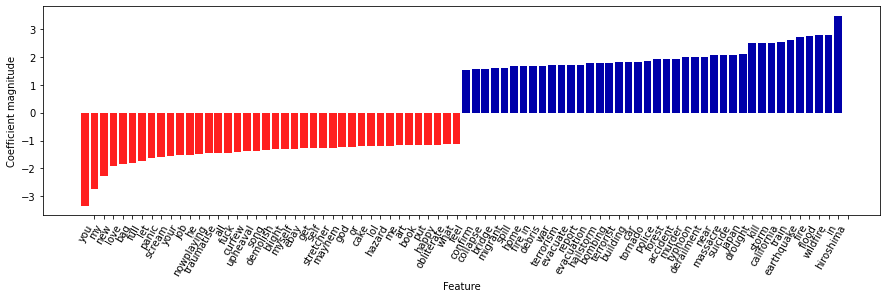

In [55]:
# extract feature names and coefficients
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

# Lemmatization

In [33]:
import re
regexp = re.compile('(?u)\\b\\w\\w+\\b')

In [34]:
regexp.findall("Hello my friend, how are you?")

['Hello', 'my', 'friend', 'how', 'are', 'you']

In [35]:
string = "Experience and experienced are quite similar words"
regexp.findall(string)

['Experience', 'and', 'experienced', 'are', 'quite', 'similar', 'words']

In [36]:
# Technically: we want to use the regexp based tokenizer
# that is used by CountVectorizer  and only use the lemmatization
# from SpaCy. To this end, we replace en_nlp.tokenizer (the SpaCy tokenizer)
# with the regexp based tokenization
import re
# regexp used in CountVectorizer:
regexp = re.compile('(?u)\\b\\w\\w+\\b')

In [1]:
import spacy

In [2]:
# load spacy language model
en_nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
old_tokenizer = en_nlp.tokenizer
# replace the tokenizer with the preceding regexp
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(
    regexp.findall(string))

In [5]:
# create a custom tokenizer using the SpaCy document processing pipeline
# (now using our own tokenizer)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

# define a count vectorizer with the custom tokenizer
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [6]:
def custom_tokenizer(document):
    from spacy.tokens import Doc
    # Load a pipeline using the name of an installed package
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    
    doc_spacy = nlp(document)
    nlp = Doc(doc_spacy.vocab, words=[t.text for t in doc_spacy])
    token_lemma_data = [token.lemma_ for token in doc_spacy]
    return token_lemma_data